In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import scipy
import emcee
import corner
import lalsimulation as ls
import h5py
import snr_calculation as s 
import populations as p

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [112]:
def get_quantiles(fname, index, quantiles, hist=False, folder='mTOV_convergence', columns=None):
    root = '/mnt/c/users/christine/gwcosmology/spin_results/' + folder
    # print(root)
    array = np.genfromtxt(root+fname)
    
    if columns is not None:
        array[:,0] = array[:, columns[0]] - array[:, columns[1]]
        index = 0
    array = array[:,index]
    if hist:
        plt.hist(array,bins=50)
    return np.quantile(array, quantiles)

In [110]:
def get_constraints_1c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_1C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [30]:
def get_constraints_lmg_2c(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[5, 6])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[5, 6])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[5, 6])
        med = get_quantiles(run_name, 2, [0.5], columns=[5, 6], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_LMG_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [71]:
def get_constraints_slope_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_slope.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 8, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 8, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 8, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 8, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_slope_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [78]:
def get_bias_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_bias.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_bias_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

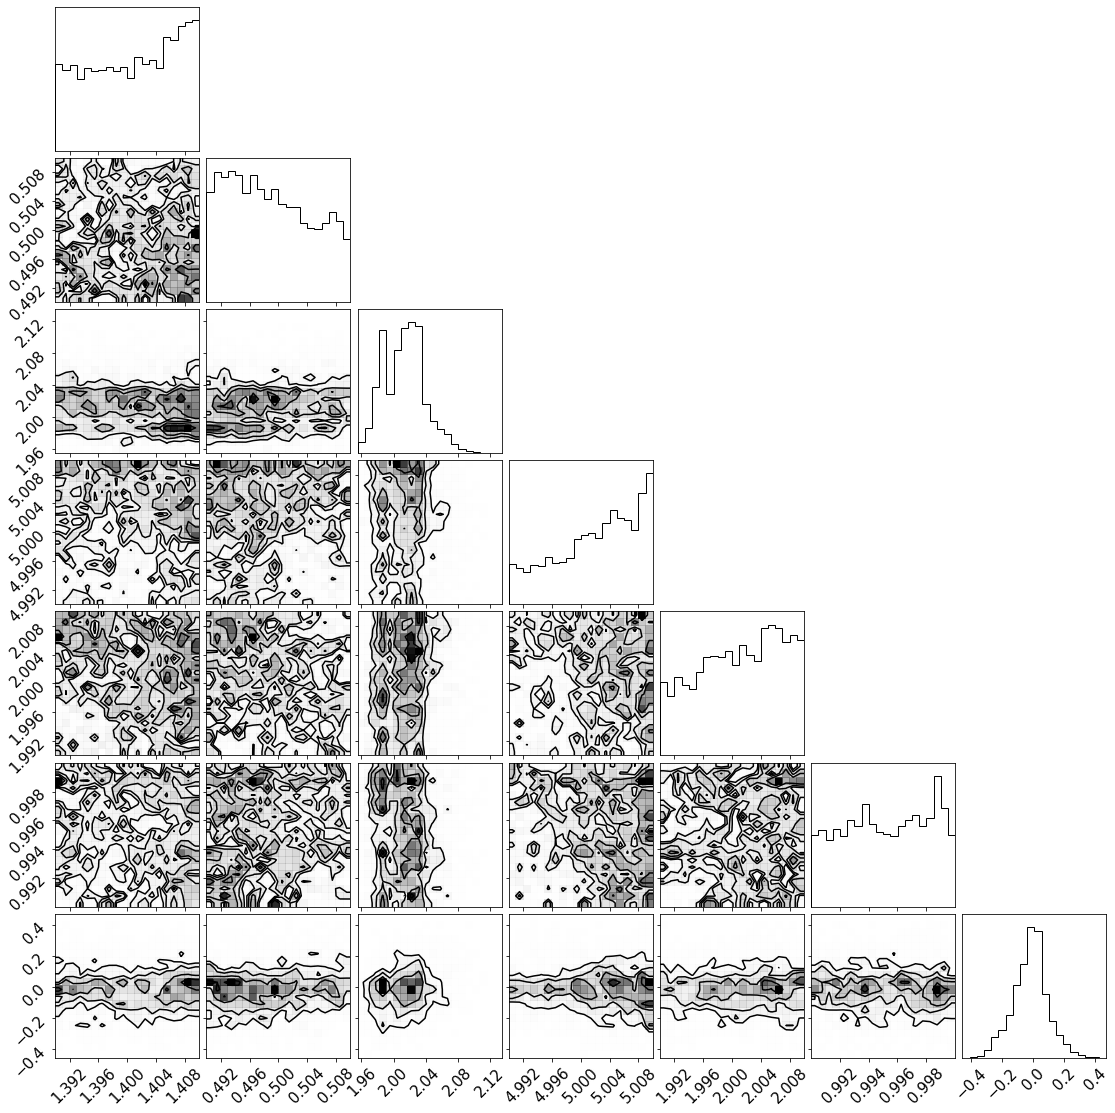

In [117]:
corner.corner(np.genfromtxt('../spin_results/mTOV_convergence/APlus_mTOV_2.0_run_150.txt'), plot_datapoints=False);

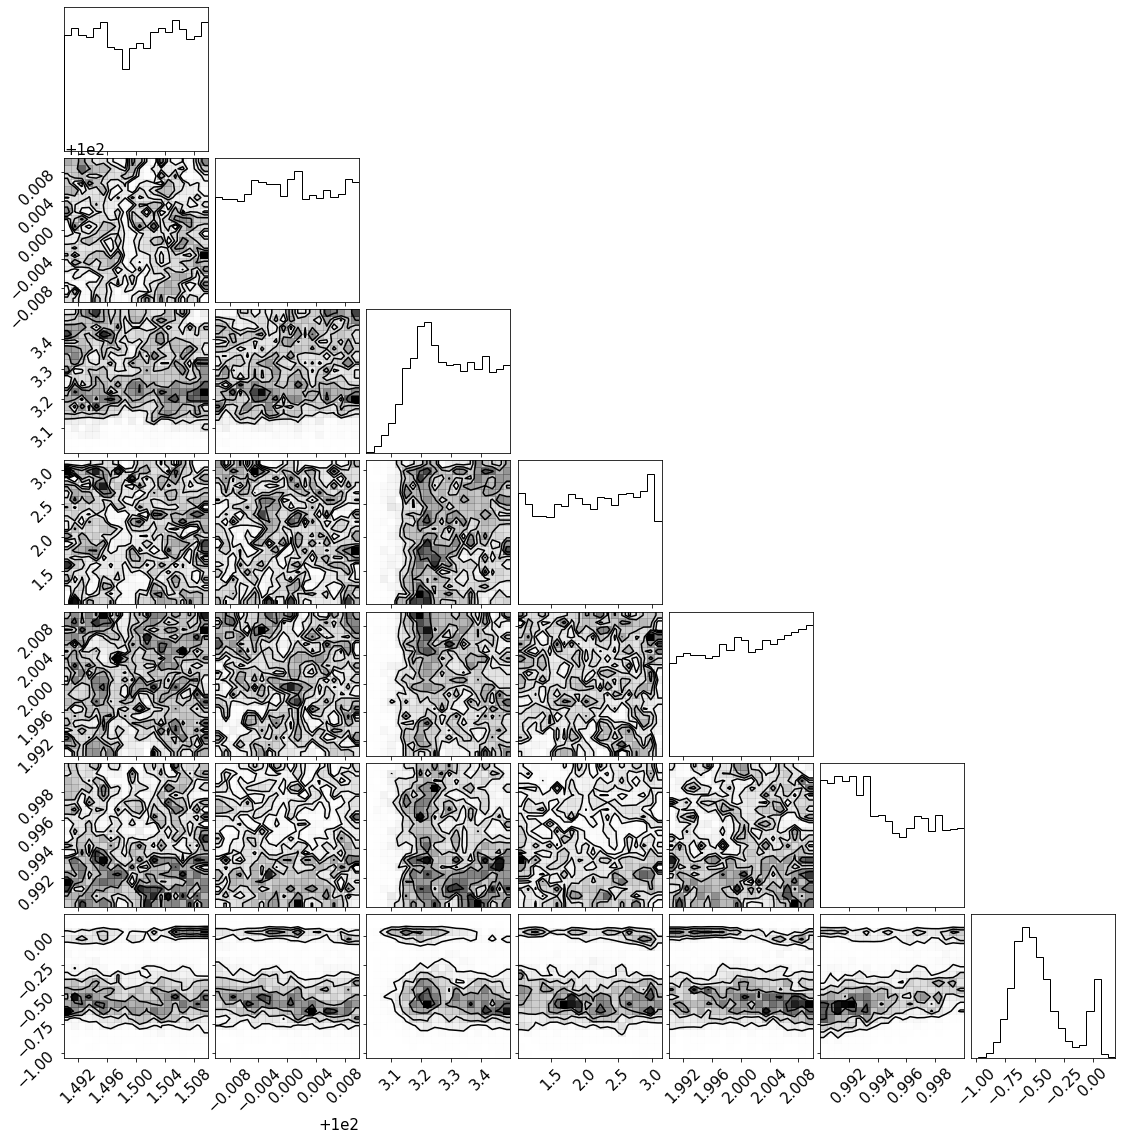

In [103]:
corner.corner(np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_3.0_bhmin_3.0_50_u.txt'), plot_datapoints=False);

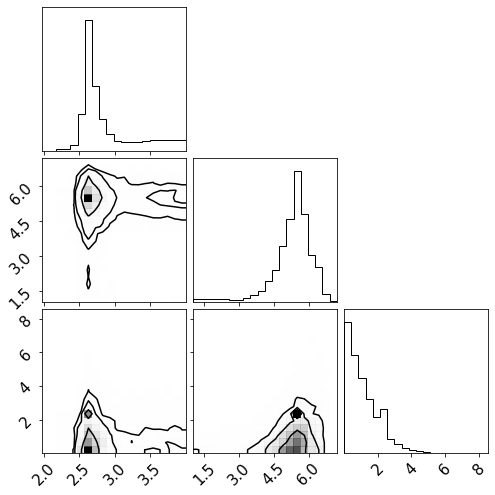

In [150]:
corner.corner(np.genfromtxt('../spin_results/real_data/default_chieff_withgw190814_withgw190426.txt')[:,[2,3,4]], plot_datapoints=False);

In [142]:
real = np.genfromtxt('../spin_results/real_data/default_pos_chieff_withgw190814_withgw190426.txt')
likes = np.genfromtxt('../spin_results/real_data/default_pos_chieff_withgw190814_withgw190426_likes.txt')

In [143]:
real = real[:,[2,3]]

In [144]:
likes = likes[np.argsort(real[:,0])]
real = real[np.argsort(real[:,0])]

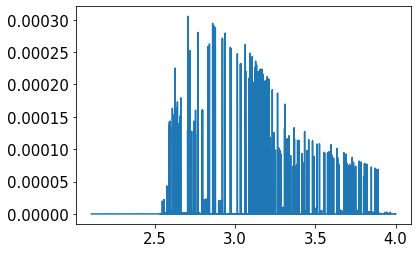

In [145]:
plt.plot(real[:,0], np.exp(likes))

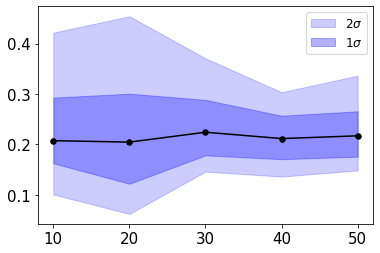

In [85]:
constraints = get_constraints_slope_2c(np.linspace(30,150,5,dtype='int16'), 2.0, detector="APlus")
plot_constraints(constraints, counts=np.linspace(10,50,5,dtype='int16'))

In [ ]:
!python mTOV_u.py --detector "Design" --event_min 2 --event_max 10 --n_events 5 --mtov_true 2 --bh_min 5 --spin_slope 0

In [41]:
constraints = -1*get_constraints_lmg_2c(np.linspace(30,150,5,dtype='int16'), 2.5, 3.01,detector="APlus")

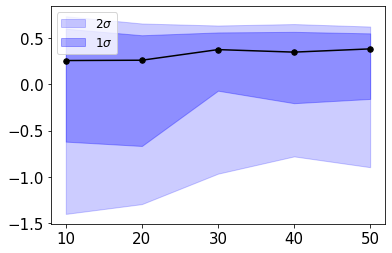

In [42]:
plot_constraints(constraints, counts=np.linspace(10,50,5,dtype='int16'))

In [107]:
def get_constraints_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2component.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [108]:
def get_constraints_u(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_uniform.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_u_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [8]:
def plot_constraints(constraints, counts, color='b'):
    # plt.fill_between(counts, constraints[:,0], constraints[:,6], color='b', alpha=0.1, label = '$3\sigma$')
    plt.fill_between(counts, constraints[:,1], constraints[:,5], color=color, alpha=0.2, label = '$2\sigma$')
    plt.fill_between(counts, constraints[:,2], constraints[:,4], color=color, alpha=0.3, label = '$1\sigma$')
    plt.plot(counts, constraints[:,3], c='k')
    plt.scatter(counts, constraints[:,3], c='k', s=30)
    plt.legend()

In [10]:
def calc_convergence(file, counts=np.linspace(10,50,5,dtype='int16'), plot=True):
    constraints = np.genfromtxt(file)
    sig3 = constraints[:,-1]-constraints[:,0]
    sig2 = constraints[:,-2]-constraints[:,1]
    sig1 = constraints[:,-3]-constraints[:,2]
    if plot:
        plt.plot(counts, sig3, label='3$\sigma$')
        plt.plot(counts, sig2, label='2$\sigma$')
        plt.plot(counts, sig1, label='1$\sigma$')
        plt.yscale('log')
        plt.xscale('log')
    p = np.polyfit(x=np.log(counts), y=np.log(sig1), deg=1)
    print(p)

In [ ]:
constraints = get_constraints_1c(counts=np.linspace(10,50,5,dtype='int16'), mTOV=2.0, hist=False, detector="Design")

Text(0.5, 0, 'Event Count')

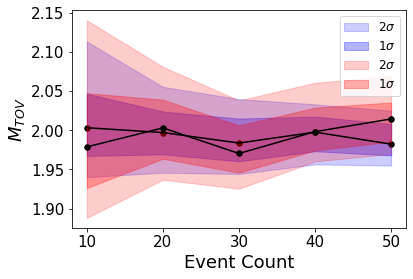

In [82]:
constraints = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/outputs/lowspin/APlus_mTOV_1C_2.0.txt')
constraints2 = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/outputs/highspin/APlus_mTOV_1C_2.0.txt')
plot_constraints(constraints, counts=np.linspace(10,50,5,dtype='int16'))
plot_constraints(constraints2, counts=np.linspace(10,50,5,dtype='int16'), color='r')
plt.ylabel('$M_{TOV}$')
plt.xlabel('Event Count')

In [399]:
f = h5py.File('./results/spinning_test_run.h5', 'r')


In [11]:
!pwd

/mnt/c/users/christine/gwcosmology/spin!!


In [139]:
samples = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component.txt')
likes = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component_likes.txt')


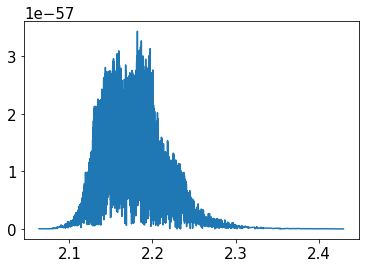

In [140]:
plt.plot(samples[:,5][np.argsort(samples[:,5])], np.exp(likes[np.argsort(samples[:,5])]))

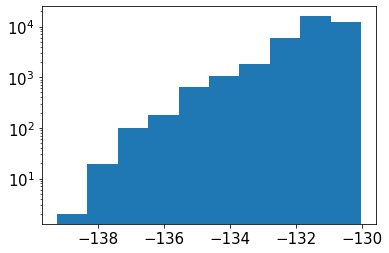

In [138]:
plt.hist(likes)
plt.yscale('log')

In [391]:
f['mcmc']['chain']

<HDF5 dataset "chain": shape (20000, 14, 7), type "<f8">

In [392]:
samples = np.array(f['mcmc']['chain']).reshape((280000,7))

In [441]:
samples.shape

(26600, 7)

In [430]:
test.pop_like(pop, [1.4, 0.5, 2, 5, 4, 1.0, 0])

-79.30117920083256

In [404]:
pop = np.genfromtxt('./results/pop_samples.txt')

In [414]:
test.samples=True

In [406]:
pop = pop.reshape((50, 3000, 4))

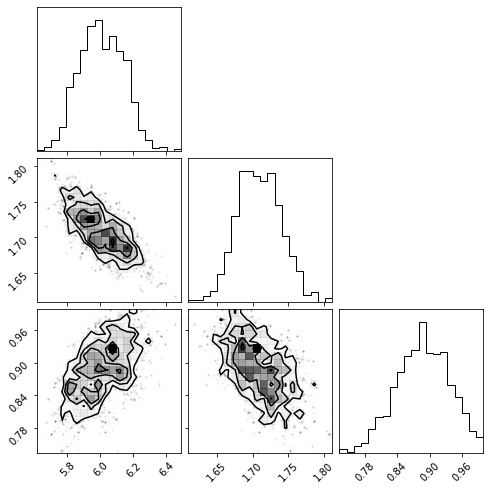

In [411]:
corner.corner(pop[30][:,[0,1,3]]);

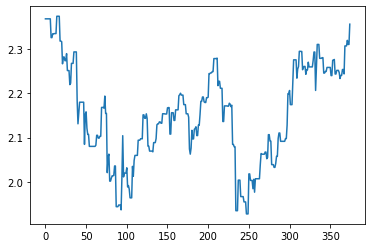

In [111]:
plt.plot(pop[1][::8,1])

In [19]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=False, spin_params=[1, 1])

vary slope: False
selection: True
spinning: False
no m1 spin: True


In [22]:
pop = test.get_population(20, False)

0.046620046620046623


In [29]:
pop = test.get_population(2, True)

[0.07833974 0.07833974 0.         0.03916987] [[5.63400248 1.9079921  0.         0.65292981]
 [5.51716354 2.01933212 0.         0.59938448]
 [5.48385806 1.95779149 0.         0.72887748]
 [5.50410028 2.13916245 0.         0.69504755]
 [5.63376871 2.14060657 0.         0.65394565]
 [5.39774097 2.02651705 0.         0.64851758]
 [5.62380392 2.09724237 0.         0.61743413]
 [5.56812976 2.13498219 0.         0.75216509]]
[0.0820522 0.0820522 0.        0.0410261] [[5.22343734 1.51057667 0.         0.2484339 ]
 [5.20038618 1.44107147 0.         0.19008616]
 [5.07586448 1.38133325 0.         0.23647295]
 [5.10985702 1.33809201 0.         0.280207  ]
 [5.1964528  1.37867288 0.         0.18934632]
 [5.25880416 1.43469351 0.         0.23712608]
 [5.17858939 1.38491933 0.         0.23171454]
 [5.10770779 1.47073542 0.         0.26577801]]


In [30]:
pop2 = test.get_population(2, True)

[0.09640242 0.09640242 0.         0.04820121] [[6.07511151 1.97636557 0.         0.94532955]
 [6.1053472  2.0362457  0.         0.9828523 ]
 [5.92715817 1.90564899 0.         0.92979429]
 [6.07141914 2.05638096 0.         0.95928703]
 [6.12357206 1.91457921 0.         0.89067565]
 [6.05441398 2.08003767 0.         1.00400275]
 [5.98903349 1.9746981  0.         0.99078162]
 [6.176506   2.06598959 0.         0.91620329]]
[0.08444752 0.08444752 0.         0.04222376] [[5.74971835 1.64266024 0.         0.66499053]
 [5.73777617 1.5503593  0.         0.66589567]
 [5.6986758  1.57905648 0.         0.67530441]
 [5.78679222 1.56597999 0.         0.67732719]
 [5.80330915 1.54708301 0.         0.61949035]
 [5.50958609 1.48421381 0.         0.66882089]
 [5.69466828 1.54922795 0.         0.65688078]
 [5.90320088 1.67935942 0.         0.59923855]]


In [32]:
np.vstack([pop, pop2]).shape

(4, 3000, 4)

In [13]:
test.samples = True
test.pop_like(pop, [1.4, 0.5, 2, 5, 4])

-76.63955081476718

In [3]:
pop = np.genfromtxt('./results/full_pop_samples.txt')

In [4]:
pop = pop.reshape((50,3000,4))

In [464]:
test.samples = True

In [25]:
pop = pop[0]

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1131: RuntimeWarning: divide by zero encountered in log
  


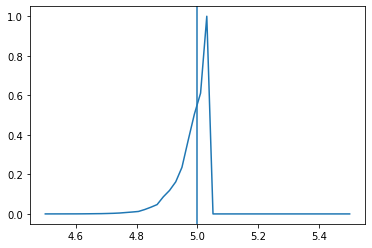

In [28]:
test.set_injection_spins(p.injection_set)
result = np.zeros(50)
slopes = np.linspace(4.5, 5.5)
#slopes = np.linspace(0.1, 1)
for i in range(50):
    result[i] = test.pop_like(pop, [1.4,  0.5,  2,slopes[i], 4])
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(5)

In [125]:
test.pop_like(pop, [1.4, 0.5, 2, 1, 3, 5, 4])

-220.07700457719875

In [413]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=True, spin_params=[1, 0])

vary slope: False
selection: True
spinning: True
no m1 spin: True


In [321]:
test = p.Population([1.4, 0.5, 2, 0, 3], 'one', False, selection=False, m1_nospin = True, spinning=False)

vary slope: False
selection: False
spinning: False
no m1 spin: True


In [310]:
pop = test.get_population(10000, False)

1.0


In [369]:
data = p.generate_truncnormal(10000,1.4, 0.5, 1, 2)

In [311]:
data = pop[:,:,0].squeeze()

In [380]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=np.sum(np.log(p.truncnormal_like(data, mus[i], sigmas[j], 1, 2) * p.like_m2(data2, data, 1, 3))) #pop[:,:,0].squeeze()

1.0


[  1.           1.99784023   2.98903023 ... 135.1032793  135.1032793
 135.1032793 ]
[0.68 0.95]


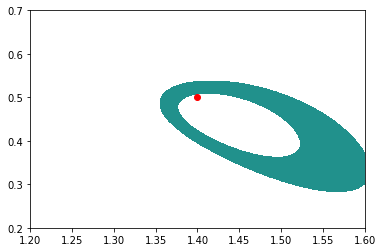

In [381]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [ ]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    print(i)
    for j in range(50):
        results[i,j]=test.pop_like(pop, params=[mus[i], sigmas[j], 2]) #pop[:,:,0].squeeze()

[  1.           1.98104363   2.95841679 ... 145.38011032 145.38011032
 145.38011032]
[0.68 0.95]


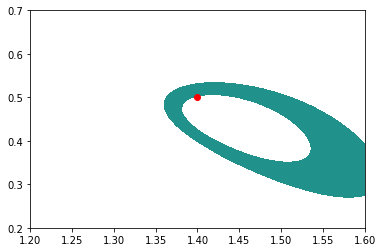

In [368]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [241]:
def credible_levels(ps, fs):
    """Find the probability levels that correspond to a given array of credible levels, e.g. to then pass into the levels argument of a contour plot
    Parameters:
       ps (1-d numpy array):
          the PDF values, a flattened array
       fs (1-d numpy array):
          the desired credible levels in ascending order, e.g. array([0.5,0.9]) for 50% and 90% credible levels
    """
    sorter = np.argsort(ps)
    ps_sorted = ps[sorter]
    ps_sorted = ps_sorted[::-1] #largest to smallest
    csum = np.cumsum(ps_sorted)
    print(csum)
    print(fs) 
    idxs = np.searchsorted(csum,fs*csum[-1])
    levels = ps_sorted[idxs]
    levels = levels[::-1]
    return levels

In [73]:
a, b = test.infer(pop, fixed={"m_TOV":2, "bh_min": 5, "bh_slope": 4, "max_jjkep": 1, "spin_slope": 1}, steps=1000)

 40%|████      | 401/1000 [00:44<01:12,  8.27it/s]/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1020: RuntimeWarning: divide by zero encountered in log
  result = np.sum([np.log(self.event_likelihood_one_single(i, params)/mu) for i in samples])
100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


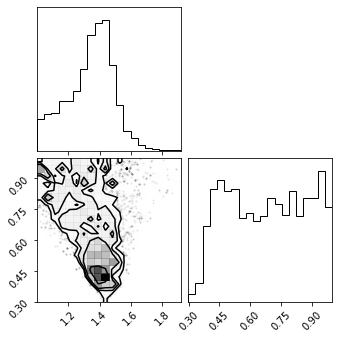

In [74]:
corner.corner(a[:,[0,1]]);

In [64]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

In [75]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])